# WeatherPy
----

In [1]:
#! pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
#cities = ['ahipara', 'lavrentiya', 'hobart', 'ushuaia', 'kamenskoye', 'gandiaye', 'ribeira grande', 'katangli']

# Create empty lists to hold data
ls_temp = []
ls_wind_speed = []
ls_humidity = []
ls_lat = []
ls_cloudiness = []
ls_lon = []
ls_country = []
ls_date = []
ls_cities = []

# Begin print statement to show process of retrieving data
print('''Beginning Data Retrieval     
-----------------------------''')

# Start city count at 1
i = 1

# loop through cities list
for city in cities:
    
    # Send request for current city in list and retrieve data
    try:      
        query_url = f"{base_url}units={units}&appid={api_key}&q={city}"
        response = requests.get(query_url).json()

        # Print a statement showing current city data is begin retrieved for
        print(f"Processing Record {i} | {city}")

        # Define variables
        temp_max = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        cloudiness = response['clouds']['all']
        lon = response['coord']['lon']
        country = response['sys']['country']
        date = response['dt']

        # Append variable values to corresponding lists
        ls_temp.append(temp_max)
        ls_wind_speed.append(wind_speed)
        ls_humidity.append(humidity)
        ls_lat.append(lat)
        ls_cloudiness.append(cloudiness)
        ls_lon.append(lon)
        ls_country.append(country)
        ls_date.append(date)
        ls_cities.append(city)

        # Increase city count by 1
        i = i+1
    
    # If data for city is not found, then skip city
    except:
        # Print statement saying city cannot be found
        print("City not found. Skipping...")
        
        # Increase city count by 1
        i = i+1
        
# print statement to show that data retrieval is complete
        print('''-----------------------------
Data Retrieval Complete     
-----------------------------''') 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 | abu samrah
Processing Record 3 | rikitea
Processing Record 4 | comodoro rivadavia
Processing Record 5 | sar-e pul
Processing Record 6 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 | saleaula
City not found. Skipping...
Processing Record 8 | albany
Processing Record 9 | batagay-alyta
Processing Record 10 | haines junction
Processing Record 11 | lagoa
Processing Record 12 | busselton
Processing Record 13 | kedougou
Processing Record 14 | hithadhoo
Processing Record 15 | khatanga
Processing Record 16 | pacifica
Processing Record 17 | sarangani
Processing Record 18 | vaini
Processing Record 19 | karaul
City not found. Skipping...
Processing Record 20 | avarua
Processing Record 21 | punta arenas
Processing Record 22 | ushuaia
Processing Record 23 | acapulco
Processing Record 24 | constitucion
Processing Record 25 | sept-iles
Pr

Processing Record 227 | weatherford
Processing Record 228 | bluff
Processing Record 229 | koslan
Processing Record 230 | kruisfontein
Processing Record 231 | nampula
Processing Record 232 | saint george
Processing Record 233 | tasiilaq
Processing Record 234 | abnub
Processing Record 235 | chapais
Processing Record 236 | miandrivazo
Processing Record 237 | santander
Processing Record 238 | saint-philippe
Processing Record 239 | tsihombe
City not found. Skipping...
Processing Record 240 | santa fe
Processing Record 241 | batticaloa
Processing Record 242 | egvekinot
Processing Record 243 | flinders
Processing Record 244 | fortuna
Processing Record 245 | poltavka
Processing Record 246 | sedelnikovo
City not found. Skipping...
Processing Record 247 | broome
Processing Record 248 | flin flon
Processing Record 249 | pilot butte
Processing Record 250 | shu
Processing Record 251 | las animas
Processing Record 252 | moose factory
Processing Record 253 | mamakan
Processing Record 254 | abu kamal


Processing Record 453 | mogok
Processing Record 454 | mahajanga
Processing Record 455 | fivizzano
Processing Record 456 | tulun
Processing Record 457 | gizo
Processing Record 458 | ngukurr
City not found. Skipping...
Processing Record 459 | alberdi
Processing Record 460 | san patricio
Processing Record 461 | penne
Processing Record 462 | dosso
Processing Record 463 | pocos de caldas
Processing Record 464 | bundaberg
Processing Record 465 | marang
City not found. Skipping...
Processing Record 466 | bolungarvik
City not found. Skipping...
Processing Record 467 | buala
Processing Record 468 | kaseda
Processing Record 469 | dandong
Processing Record 470 | carutapera
Processing Record 471 | tessalit
Processing Record 472 | kleck
City not found. Skipping...
Processing Record 473 | beringovskiy
Processing Record 474 | srednekolymsk
Processing Record 475 | henderson
Processing Record 476 | nome
Processing Record 477 | virginia beach
Processing Record 478 | rohru
Processing Record 479 | pimente

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Create dataframe with the lists created above
city_data = pd.DataFrame({'City': ls_cities,
                          'Cloudiness': ls_cloudiness,
                          'Country': ls_country,
                          'Humidity': ls_humidity,
                          'Date': ls_date,
                          'Lat': ls_lat,
                          'Lng': ls_lon,
                          'Max Temp': ls_temp,
                          'Wind Speed': ls_wind_speed})

# Export the city data into a .csv file
city_data.to_csv("output_data/city_data.csv", encoding="utf-8", index=False)

# Display the DataFrame
city_data.head()

,City,Cloudiness,Country,Humidity,Date,Lat,Lng,Max Temp,Wind Speed
0,abu samrah,11,SY,27,1559251333,35.30,37.18,84.50,8.72
1,rikitea,73,PF,81,1559251333,-23.12,-134.97,77.30,14.70
2,comodoro rivadavia,0,AR,65,1559251333,-45.87,-67.48,46.40,6.93
3,sar-e pul,0,AF,31,1559251333,36.22,65.93,80.18,4.70
4,albany,40,US,64,1559251118,42.65,-73.75,73.99,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Define variables to store current month, day, and year
month = datetime.now().month
day = datetime.now().day
year = (datetime.now().year) - 2000

# Define current date
date = f"{month}/{day}/{year}"

#### Latitude vs. Temperature Plot

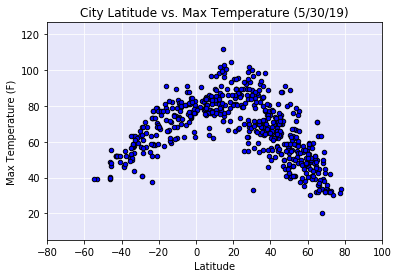

In [10]:
# Create scatter plot to show correlation between Lat and Max Temp
ax = city_data.plot(kind='scatter', x='Lat', y='Max Temp', color='blue', edgecolor='black')

# Format the scatter plot to include, title, labels, gridlines
ax.set_title(f'City Latitude vs. Max Temperature ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.grid(color='white')

# Have gridlines print behind data points
# https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements
ax.set_axisbelow(True)

# Change the background color of the scatter plot
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html#matplotlib.axes.Axes.set_facecolor
ax.set_facecolor('lavender')

# Define the top_lim (max) and bottom_lim (min) of Max Temp
top_lim = city_data['Max Temp'].max()
bottom_lim = city_data['Max Temp'].min()

# Change range of y-axis (Max Temp) 
ax.set_ylim(bottom_lim -15, top_lim +15)

# Change range of x-axis (Lat)
ax.set_xlim(-80, 100)

# Save scatter plot to file
plt.savefig('output_data/temp.png', dpi=150)
plt.show()


#### Latitude vs. Humidity Plot

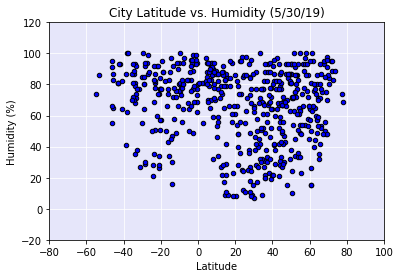

In [11]:
# Create scatter plot to show correlation between Lat and Humidity
ax = city_data.plot(kind='scatter', x='Lat', y='Humidity', color='blue', edgecolor='black')

# Format the scatter plot to include, title, labels, gridlines
ax.set_title(f'City Latitude vs. Humidity ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(color='white')

# Have gridlines print behind data points
# https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements
ax.set_axisbelow(True)

# Change the background color of the scatter plot
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html#matplotlib.axes.Axes.set_facecolor
ax.set_facecolor('lavender')

# Change range of x and y axis
ax.set_ylim(-20, 120)
ax.set_xlim(-80, 100)

# Save scatter plot to file
plt.savefig('output_data/humidity.png', dpi=150)
plt.show()

#### Latitude vs. Cloudiness Plot

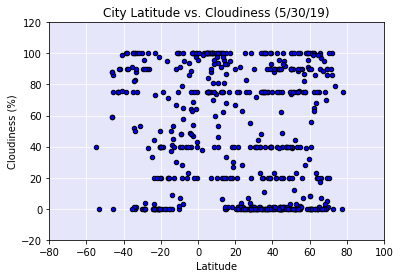

In [12]:
# Create scatter plot to show correlation between Lat and Cloudiness
ax = city_data.plot(kind='scatter', x='Lat', y='Cloudiness', color='blue', edgecolor='black')

# Format the scatter plot to include, title, labels, gridlines
ax.set_title(f'City Latitude vs. Cloudiness ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(color='white')

# Have gridlines print behind data points
# https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements
ax.set_axisbelow(True)

# Change the background color of the scatter plot
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html#matplotlib.axes.Axes.set_facecolor
ax.set_facecolor('lavender')

# Change range of x and y axis
ax.set_ylim(-20, 120)
ax.set_xlim(-80, 100)

# Save scatter plot to file
plt.savefig('output_data/cloudiness.png', dpi=150)
plt.show()

#### Latitude vs. Wind Speed Plot

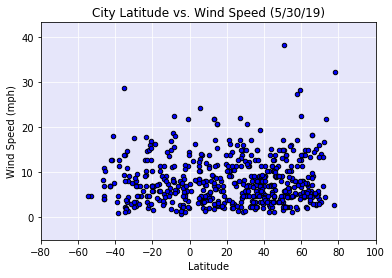

In [13]:
# Create scatter plot to show correlation between Lat and Wind Speed
ax = city_data.plot(kind='scatter', x='Lat', y='Wind Speed', color='blue', edgecolor='black')

# Format the scatter plot to include, title, labels, gridlines
ax.set_title(f'City Latitude vs. Wind Speed ({date})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid(color='white')

# Have gridlines print behind data points
# https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements
ax.set_axisbelow(True)

# Change the background color of the scatter plot
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html#matplotlib.axes.Axes.set_facecolor
ax.set_facecolor('lavender')

# Define the top_lim (max) of wind speed
top_lim = city_data['Wind Speed'].max()

# Change range of y-axis (Wind Speed)
ax.set_ylim(-5, top_lim +5)

# Change range of x-axis (Lat)
ax.set_xlim(-80, 100)

# Save scatter plot to file
plt.savefig('output_data/wind_speed.png', dpi=150)
plt.show()

## Observations 

1) Between 0 a 20 degrees latitude the max temps are higher. Given that the equator falls at 0 degrees latitude, this is not surprising.

2) There is no constant correlation between Degrees Latitude and Cloudiness. However there is a cluster of data around coordinates (0, 100) that shows there to be 100% cloudiness for several cities right on the equator. Alternatively, there is a gap with no data points at coordinate (0,0) showing there to be no cities on the equator with 0% cloudiness

3) Wind speeds are primarily between 0 and 20 mph. Very few cities have wind speeds above 30 mph.

4) The cities that fall within 10 degrees of the equator have a humidity of about 50% or higher. With there being no cities on the equator showing a humidity of below 50%, this tells me that cities closer to the equator tend to have higher humidity.